In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import sympify, solveset, diff, Interval, lambdify, S, EmptySet, integrate, sqrt, solve
from sympy.calculus.util import continuous_domain
from sympy.abc import x, y
from scipy.stats import norm, chi2

# Task 1

def sol_is_not_empty(sol) -> bool:
    return solveset(diff(sol, y) > 0, y, S.Reals) is not EmptySet

def fun_is_continuous(fun) -> bool:
    return continuous_domain(fun, y, S.Reals).is_proper_superset(Interval(0, 1))

def find_inverse_func(input_text):
    funcs = []
    ex = sympify(input_text)
    expr = ex - y
    results = solve(expr, x)

    for result in results:
        if sol_is_not_empty(result) and fun_is_continuous(result):
            print(result)
            funcs.append(lambdify(y, result))

    return funcs

In [12]:
def rand():
    return np.random.uniform(low=0, high=1, size=None)

def get_data(N, func):
    result = []
    for i in range(N):
        result.append(func(rand()))
    return result


In [13]:
def get_average(data, size):
    return sum(data) / size
     
def get_real_average(function, limits):
    # integrate для теоретических значений моментов
    return integrate(x * function, (x, limits[0], limits[1]))

def get_disp(data, average):
    result = 0
    for item in data:
        result += (item - average) ** 2
    return result / number_of_tests

def get_real_disp(function, limits, average):
    return (integrate(x ** 2 * function, (x, limits[0], limits[1])) - average ** 2).evalf()

def get_delta(offset):
    t = norm.ppf(gamma / 2 + 0.5)
    return t * offset / np.sqrt(number_of_tests)

def get_offset_delta(test_offset):
    alphas = ((1 - gamma) / 2, (1 + gamma) / 2)
    chis = (chi2.isf(alphas, number_of_tests - 1))
    temp = np.sqrt(number_of_tests - 1) * test_offset
    
    return (temp / np.sqrt(chis[0]), temp / np.sqrt(chis[1]))

In [47]:
inverse_function = ""
distribution_expression = ""
plt.rcParams["figure.figsize"] = (5, 15)

input_text = input("Введите функцию для поиска обратной функции: ")
inverse_func = find_inverse_func(input_text)[0]
number_of_tests = int(input("Введите количество тестов для функции(количество рандомных значений, которые будут сгенерированы): "))
number_of_dots = int(input("Введите количество точек на графике: "))
gamma = float(input("Введите надёжность интервальной оценки: "))
data = get_data(number_of_tests, inverse_func)
limits = (inverse_func(0), inverse_func(1))

ex = sympify(input_text)
derivative_expr = diff(ex, x)

y**(1/3)
-y**(1/3)/2 - sqrt(3)*I*y**(1/3)/2
-y**(1/3)/2 + sqrt(3)*I*y**(1/3)/2


In [32]:
mu = get_average(data, number_of_tests)
tmu = float(get_real_average(derivative_expr, limits))
disp = get_disp(data, get_average(data, number_of_tests))
tdisp = float(get_real_disp(derivative_expr, limits, float(get_real_average(derivative_expr, limits))))
standard_deviation = sqrt(get_disp(data, get_average(data, number_of_tests)))
tstandard_deviation = sqrt(float(get_real_disp(derivative_expr, limits, float(get_real_average(derivative_expr, limits)))))

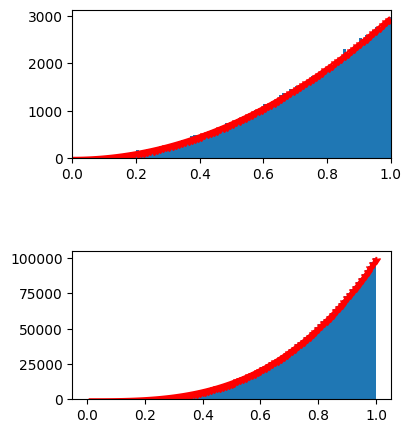

In [48]:
hist, bins = np.histogram(data, bins=number_of_dots, range=limits)
plt.subplot(6, 1, 1)  
plt.tight_layout(pad = 5)
plt.hist(x=data, bins=number_of_dots, range=limits)
plt.xlim(limits)
    
derivative_expr = diff(ex, x)
    
length = (limits[1] - limits[0]) / number_of_dots
dots = np.arange(limits[0] + length / 2, limits[1], length)
derivative = lambdify(x, length * number_of_tests * derivative_expr)
results = list(map(derivative, dots))
plt.plot(dots, results, marker=11, color="r")
    
extra_hist = hist.copy()
    
for i in range(1, len(hist)):
    extra_hist[i] += extra_hist[i-1]
        
plt.subplot(6, 1, 2)
ax = plt.gca()
ax.bar(bins[:-1], extra_hist, width = length, align="edge")

distribution_function = lambdify(x, number_of_tests * ex)
distribution_dots = np.arange(limits[0] + length, limits[1] + length / 10, length)
distribution_results = list(map(distribution_function, distribution_dots))
    
plt.plot(distribution_dots, distribution_results, marker=11, color="r")

In [49]:
delta = get_delta(sqrt(float(get_real_disp(derivative_expr, limits, float(get_real_average(derivative_expr, limits))))))
offset_delta = get_offset_delta(sqrt(get_disp(data, get_average(data, number_of_tests))))

print("На интервале от  ", limits[0], " до ", limits[1])
print("Выборочное математическое ожидание: ", mu)
print("Теоретическое математическое ожидание: ", tmu)
print("Выборочная дисперсия : ", disp)
print("Теоретическая дисперсия: ", tdisp)
print("Выборочное среднее квадратическое отклонение: ", standard_deviation)
print("Теоретическое среднее квадратическое отклонение: ", tstandard_deviation)
print("Доверительный интервал мат ожидания: ", (mu-delta, mu+delta))
print("Доверительный интервал дисперсии: ", tuple(np.square(offset_delta)))
print("Доверительный интервал среднего квадратического отклонения: ", offset_delta)

На интервале от   0.0  до  1.0
Выборочное математическое ожидание:  0.7500219720517092
Теоретическое математическое ожидание:  0.75
Выборочная дисперсия :  0.03751872197910111
Теоретическая дисперсия:  0.03749999999999998
Выборочное среднее квадратическое отклонение:  0.193697501220592
Теоретическое среднее квадратическое отклонение:  0.193649167310371
Доверительный интервал мат ожидания:  (0.748821744132620, 0.751222199970798)
Доверительный интервал дисперсии:  (0.0371364972341279, 0.0377932631637716)
Доверительный интервал среднего квадратического отклонения:  (0.192708321652512, 0.194404894906923)


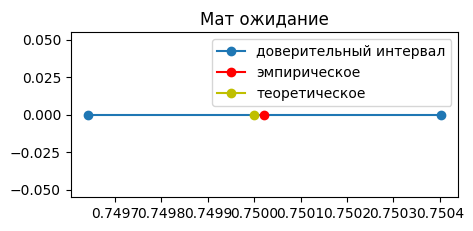

In [35]:
plt.subplot(6, 1, 3)
plt.plot((mu-delta, mu+delta), [0, 0], marker="o", label="доверительный интервал")
plt.plot(mu, 0, marker="o", color="r", label="эмпирическое")
plt.plot(tmu, 0, marker="o", color="y", label="теоретическое")
plt.title("Мат ожидание")
plt.legend()

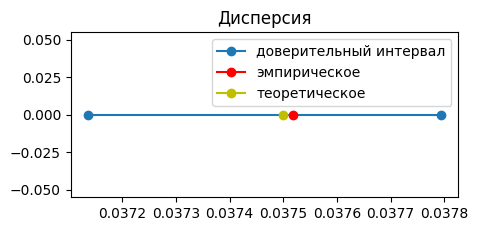

In [50]:
plt.subplot(6, 1, 4)
plt.plot(tuple(np.square(offset_delta)), [0, 0], marker="o", label="доверительный интервал")
plt.plot(disp, 0, marker="o", color="r", label="эмпирическое")
plt.plot(tdisp, 0, marker="o", color="y", label="теоретическое")
plt.title("Дисперсия")
plt.legend()

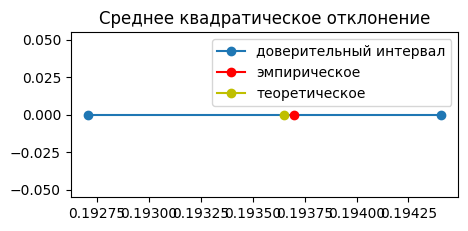

In [51]:
plt.subplot(6, 1, 5)
plt.plot(offset_delta, [0, 0], marker="o", label="доверительный интервал")
plt.plot(standard_deviation, 0, marker="o", color="r", label="эмпирическое")
plt.plot(tstandard_deviation, 0, marker="o", color="y", label="теоретическое")
plt.title("Среднее квадратическое отклонение")
plt.legend()


Критерий согласия Пирсона:
Критический кси-квадрат 120.98964369660958
Кси-квадрат выборки 84.67985501346531
Гипотезу согласия принимаем


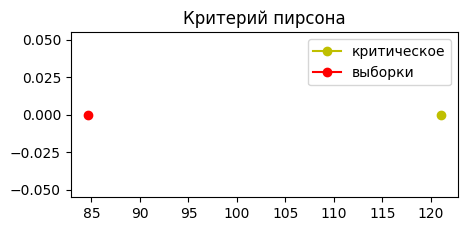

In [38]:
hypothesis_error_value = float(input("Введите значение, при котором гипотеза будет отвергаться: "))
k = number_of_dots - 2 - 1
critical_value = chi2.isf(hypothesis_error_value, k)
normal_value = 0
    
for i in range(number_of_dots):
    normal_value += np.square(hist[i] - results[i]) / results[i]

print("\nКритерий согласия Пирсона:")
print(f"Критический кси-квадрат {critical_value}")
print(f"Кси-квадрат выборки {normal_value}")
result_for_print = "принимаем" if normal_value < critical_value else "отвергаем"
print(f"Гипотезу согласия {result_for_print}")

plt.subplot(6, 1, 6)
plt.plot(critical_value, 0, marker="o", c="y", label="критическое")
plt.plot(normal_value, 0, marker="o", color="r", label="выборки")
plt.title("Критерий пирсона")
plt.legend()

### Задание 2. Биномиальное распределение

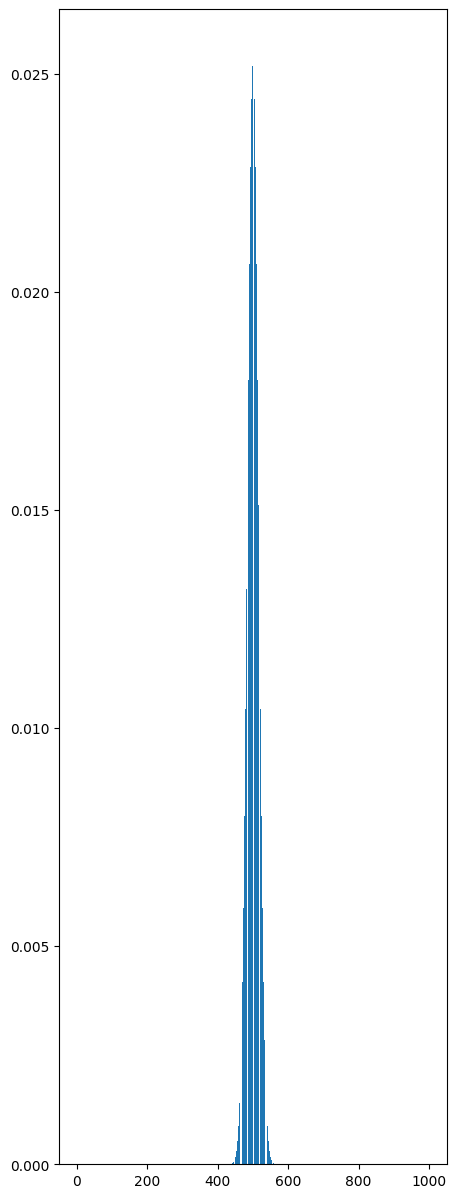

In [39]:
import matplotlib.pyplot as plt

n = int(input("Введите параметр n биномиального распределения: "))
p = float(input("Введите параметр p биномиального распределения: "))

class Binom:
    @staticmethod
    def __factorial(n: int) -> int:
        val:int = 1
        for i in range(1, n+1):
            val *= i
        return val

        
    @staticmethod
    def __get_count_of_combinations(n:int, k:int) -> int:
        return Binom.__factorial(n)/(Binom.__factorial(k)*Binom.__factorial(n-k))

    @staticmethod
    def bin(n:int, p:int, k:int) -> int:
        return Binom.__get_count_of_combinations(n,k)*(p**k)*((1-p)**(n-k))

r = list(range(n + 1))
dist = [Binom.bin(n, p, k) for k in r]

plt.bar(r, dist)
plt.show()
        

(array([10., 18., 44., 75., 95., 98., 80., 46., 25.,  5.,  4.]),
 array([459.        , 467.09090909, 475.18181818, 483.27272727,
        491.36363636, 499.45454545, 507.54545455, 515.63636364,
        523.72727273, 531.81818182, 539.90909091, 548.        ]),
 <BarContainer object of 11 artists>)

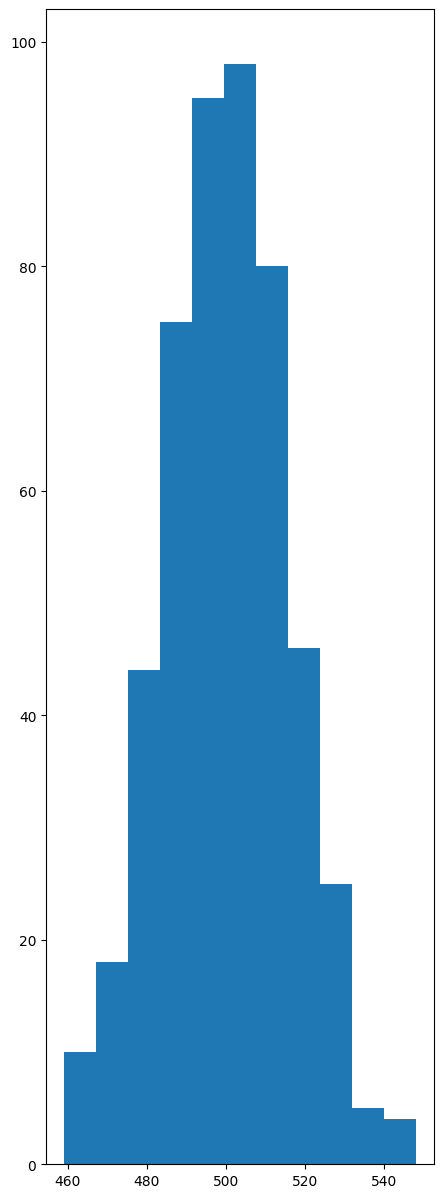

In [40]:
import numpy as np
import matplotlib.pyplot as plt

trials = 500

n = int(input("Введите n для биномиального распредления: "))

p = float(input("Введите вероятность успеха для каждого испытания: "))

def run_binom(trials, n, p):
    heads = []
    for _ in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i<=p]))
    return heads

heads = run_binom(trials, n, p)
plt.hist(heads, 11)

In [44]:
# Точечные оценки биномиального распределения
import math

m_binom = 0
d_binom = 0
for i in range(0, len(heads)):
    m_binom += heads[i]
m_binom /= trials

for i in range(0, len(heads)):
    d_binom += math.pow((heads[i] - m_binom), 2)
d_binom /= (trials - 1)

print(f'Точечное мат. ожидание {m_binom}')
print(f'Точечная дисперсия {d_binom}')

Точечное мат. ожидание 500.164
Точечная дисперсия 238.96703807615245


In [46]:
# Интервальная оценка Биномиального распределения
def count_happened_event(val:int):
    count = 0
    for i in range(0, len(heads)):
        if heads[i] == val:
            count += 1
    return count

val = int(input("Для какого значения строим доверительный интервал? "))

# t - критическое значение нормального распределения 
# для уровня доверия 0.95

p = 0.95
t = 1.96

prob = count_happened_event(val) / trials

delta = t * math.pow(((prob * (1 - prob)) / trials), 1/2)

print(f'Доверительный интервал для {val}, p = {p} probability = {prob}:')
print('(', prob - delta, ', ', prob + delta, ')')

Доверительный интервал для 480, p = 0.95 probability = 0.014:
( 0.0037015101689616657 ,  0.024298489831038335 )


In [8]:
from scipy import stats

prob = float(input("Введите вероятность успеха для каждого испытания:"))

xhi = 0
for i in range(0, n):
    n_i = count_happened_event(i) / trials
    if n_i != 0:
        xhi += np.square((n_i - Binom.bin(n,prob, i))) / n_i
res = stats.chi2.ppf(0.95, n - 3)
print(f'Hi-real {xhi}. Hi-teor {res}')
print(xhi < res)

Hi-real 0.11062194341061254. Hi-teor 1071.568999044425
True
